# Introduction

Breast cancer is one of the most common cancers among women worldwide, representing a significant public health concern. Early diagnosis is crucial for improving breast cancer survival rates. In this project, we aim to leverage the power of machine learning to assist in the early detection and diagnosis of breast cancer. We will be working with the Breast Cancer Wisconsin (Diagnostic) Dataset, a well-known dataset in the field of medical machine learning.

The dataset comprises features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. It includes measurements for characteristics of the cell nuclei present in the image, such as texture, perimeter, area, smoothness, and symmetry. The objective of this analysis is twofold:

1. **Exploratory Data Analysis (EDA)**: To gain insights into the dataset by visualizing the distribution of various features and exploring their relationships. The EDA will help us understand the underlying patterns in the data and guide the preprocessing steps.

2. **Model Building and Evaluation**: To apply a machine learning model that can accurately classify tumors into malignant (cancerous) or benign (non-cancerous). We will use the Perceptron algorithm, a simple yet powerful linear classifier, as our initial model. The model's performance will be evaluated using metrics such as accuracy, precision, recall, and F1 score.

By the end of this project, we aim to demonstrate how machine learning can be applied to medical data to assist healthcare professionals in making more accurate diagnoses. This project is intended for educational purposes and to showcase the workflow of data analysis and model development in Python.

# Data Loading and Overview

## Importing Libraries

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [2]:
# Load the dataset
cancer_data = load_breast_cancer()

# Convert to a DataFrame for easier manipulation and visualization
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df['target'] = cancer_data.target

In [3]:
# Display the first few rows of the DataFrame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Dataset Overview

In [4]:
# Display the shape of the DataFrame
print("Dataset shape:", df.shape)

Dataset shape: (569, 31)


In [5]:
# Summary of the dataset's features
print("Features Summary:")
df.describe()

Features Summary:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
# Count of each class in the target variable
print("\nTarget Variable Distribution:")
df['target'].value_counts(normalize=True)


Target Variable Distribution:


1    0.627417
0    0.372583
Name: target, dtype: float64

It appears that approximately 62.74% of the tumors in the dataset are labeled as malignant (1), and 37.26% are labeled as benign (0). This information is crucial as it shows that the dataset is relatively balanced but does have a higher prevalence of malignant cases. 

# Preliminary Data Analysis

## Checking for Missing Values

In [7]:
# Check for missing values in the dataset
missing_values_count = df.isnull().sum()

# Display the count of missing values for each feature
print("Missing Values Count:")
print(missing_values_count)

Missing Values Count:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


## Examining Data Types

In [8]:
# Display data types of each feature
print("Data Types:")
print(df.dtypes)

Data Types:
mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst sy

# Exploratory Data Analysis (EDA)

## Visualizing the Distribution of Features

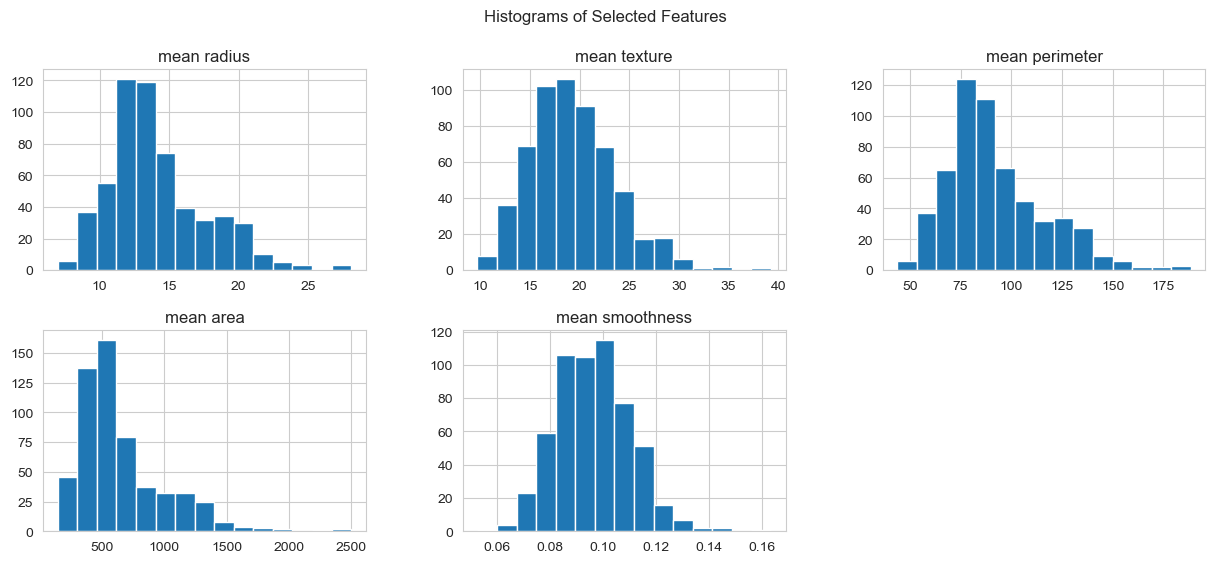

In [9]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot histograms for selected features
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
df[selected_features].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.suptitle('Histograms of Selected Features')
plt.show()

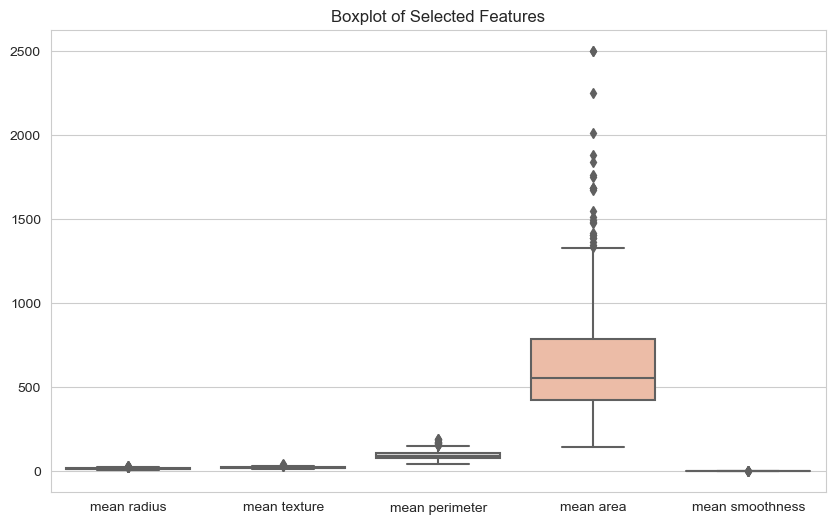

In [10]:
# Box plots to visualize the distribution and identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[selected_features], palette="coolwarm")
plt.title('Boxplot of Selected Features')
plt.show()

## Analyzing Feature Relationships

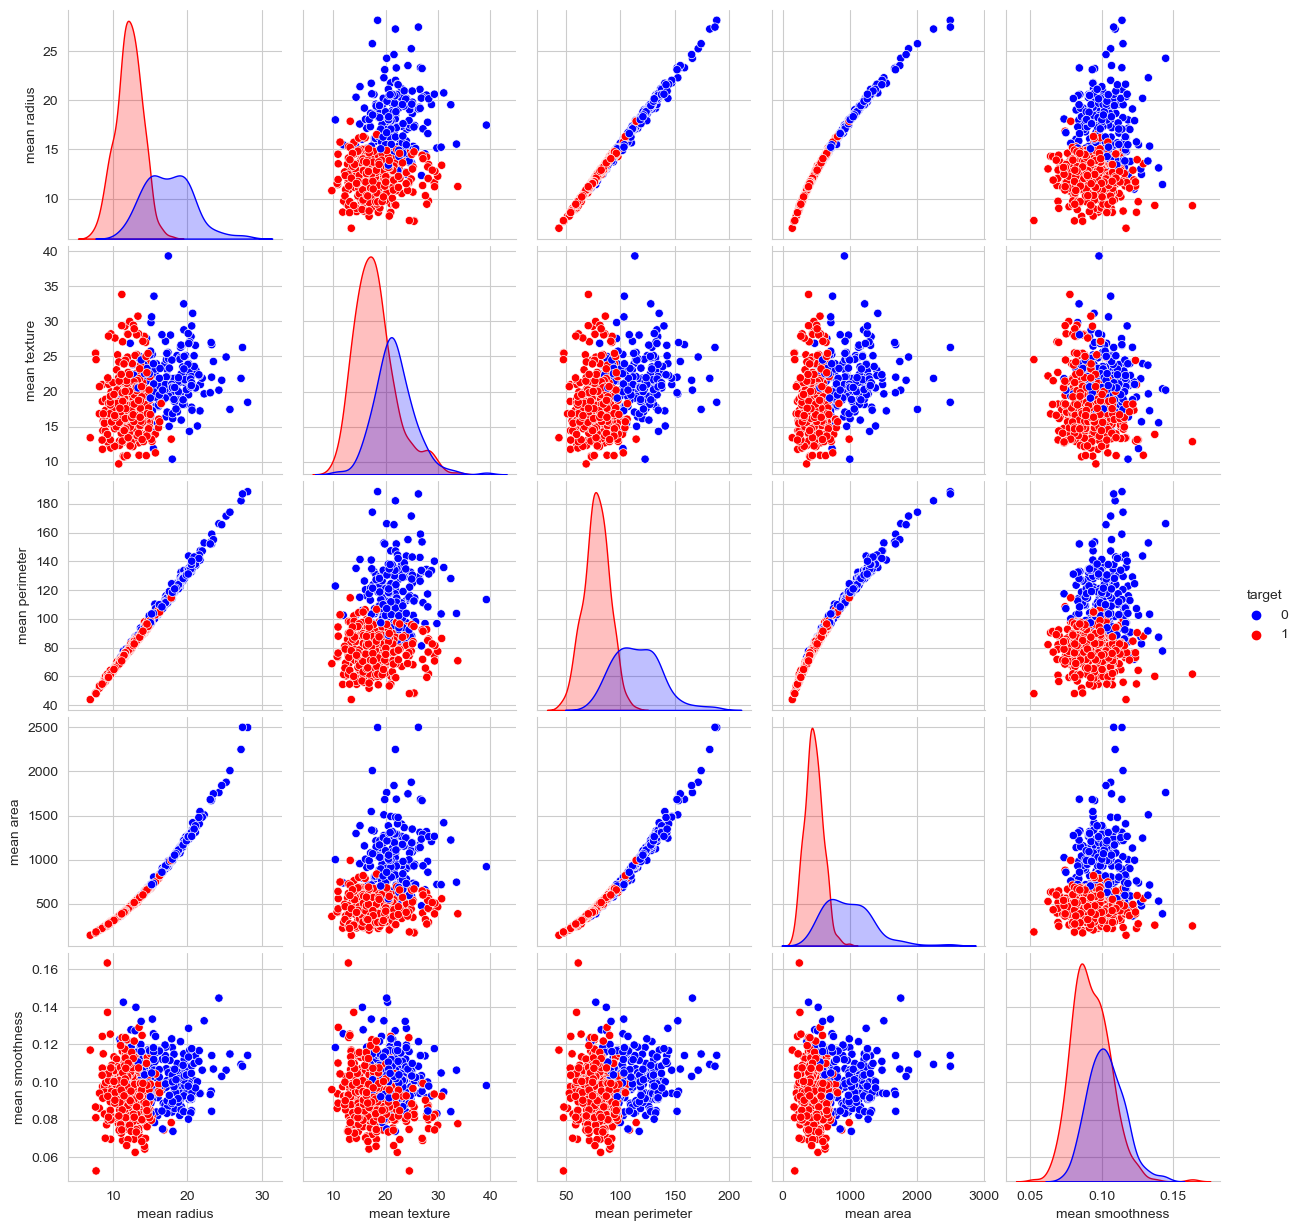

In [11]:
# Pairplot for selected features and the target with specified colors
sns.pairplot(df[selected_features + ['target']], hue='target', palette={0: 'blue', 1: 'red'})
plt.show()

**Bivariate Relationships**: It is evident that certain features such as mean radius, mean perimeter, and mean area are highly correlated. This is expected as the geometrical measurements related to the size and shape of the tumor are usually correlated.

**Class Separation Observations:**

- *Clear Separation in Some Features:* Certain features like mean radius, mean perimeter, and mean area show a clear separation between the two classes. For example, benign tumors (blue) tend to have smaller values in these features, while malignant tumors (red) tend to have larger values. This suggests that these features are strong predictors for classifying the tumors.

- *Overlap in Other Features:* Features like mean texture and mean smoothness show some overlap between benign and malignant tumors. While there is a tendency for malignant tumors to have higher values of mean texture, the overlap indicates that this feature alone might not be as strong a predictor as mean radius or mean perimeter.

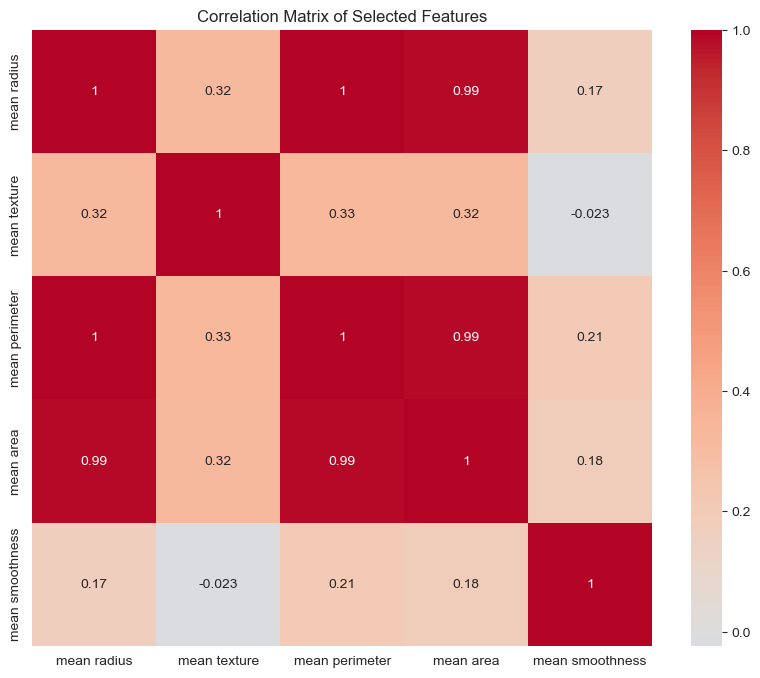

In [12]:
# Correlation matrix to see the relationship between features
plt.figure(figsize=(10, 8))
corr_matrix = df[selected_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Selected Features')
plt.show()

## Target Variable Analysis

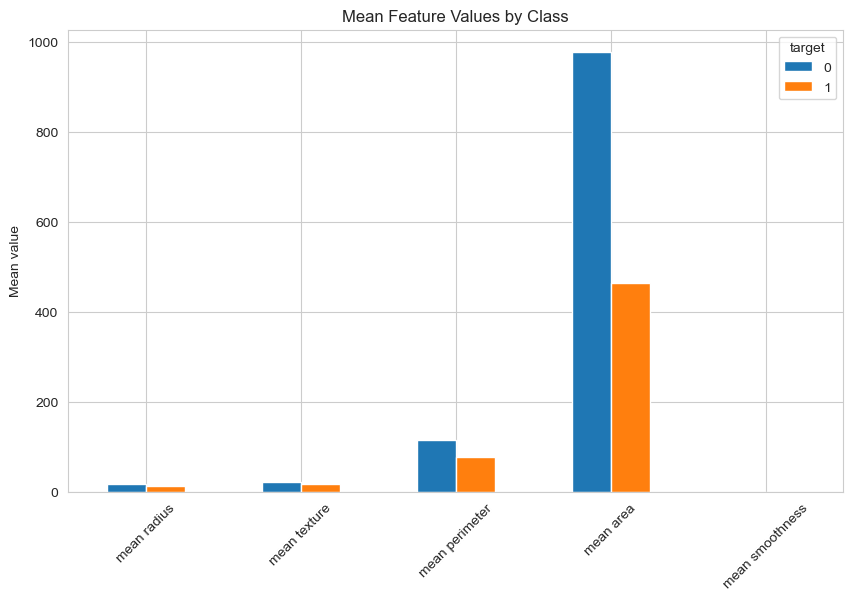

In [13]:
# Calculate the mean values of each feature for benign and malignant tumors
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'target']
mean_features = df[selected_features].groupby('target').mean()

# Plotting the mean feature values by class
mean_features.T.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Feature Values by Class')
plt.xticks(rotation=45)
plt.ylabel('Mean value')
plt.show()

## Independent Samples t Tests and Effect Sizes

In [14]:
from scipy.stats import ttest_ind

In [15]:
# Load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Calculate Cohen's d for each feature
def cohens_d(group1, group2):
    # Calculate the size of samples
    n1, n2 = len(group1), len(group2)
    # Calculate the variance of the samples
    s1, s2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    # Calculate the pooled standard deviation
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # Calculate the means of the samples
    u1, u2 = np.mean(group1), np.mean(group2)
    # Calculate the effect size
    return (u1 - u2) / s

# Initialize a list to hold the analysis results
analysis_results = []

# Conducting t-tests and calculating Cohen's d for each feature
for feature in df.columns[:-1]:
    benign = df[df['target'] == 0][feature]
    malignant = df[df['target'] == 1][feature]
    # Perform the t-test
    t_stat, p_val = ttest_ind(benign, malignant)
    # Calculate Cohen's d
    effect_size = cohens_d(malignant, benign)
    # Append the results to the list
    analysis_results.append((feature, round(p_val,4), round(effect_size,4)))

# Convert the list to a DataFrame
results_df = pd.DataFrame(analysis_results, columns=['Feature', 'P-Value', 'Cohens d'])

# Sort the results by absolute effect size in descending order
results_df = results_df.sort_values(by='Cohens d', key=abs, ascending=False).reset_index(drop=True)

results_df

,Feature,P-Value,Cohens d
0,worst concave points,0.0000,-2.6926
1,worst perimeter,0.0000,-2.5982
2,mean concave points,0.0000,-2.5452
3,worst radius,0.0000,-2.5439
4,mean perimeter,0.0000,-2.2895
5,worst area,0.0000,-2.2302
6,mean radius,0.0000,-2.2055
7,mean area,0.0000,-2.0757
8,mean concavity,0.0000,-2.0033
9,worst concavity,0.0000,-1.8119


The dataframe lists the p-values and Cohen's d values for the features from the Breast Cancer Wisconsin (Diagnostic) Dataset. 

1. **Features with High P-Values and Small Effect Sizes**:
   - `mean fractal dimension`: With a p-value of 0.7599 and a Cohen's d of 0.0265, this feature has a high p-value and a negligible effect size, suggesting it may not be helpful in differentiating between benign and malignant tumors.
   - `texture error`: With a p-value of 0.8433 and a Cohen's d of 0.0171, similar to `mean fractal dimension`, this feature is not statistically significant and has a minimal effect size.
   - `symmetry error`: With a p-value of 0.8766 and a Cohen's d of 0.0135, this feature also shows no statistical significance and a negligible effect size.
   
   These features (`mean fractal dimension`, `texture error`, and `symmetry error`) may be candidates for elimination from the model due to their lack of statistical significance and minimal effect sizes.

2. **Features with P-Values Just Above the Typical Alpha Level**:
   - `fractal dimension error`: While the p-value is slightly above the typical alpha level of 0.05 (p = 0.0631), the effect size is still relatively small (Cohen's d = -0.1615), indicating a limited contribution to class separation.
   - `smoothness error`: Although not statistically significant (p = 0.1103), it has a small positive effect size (Cohen's d = 0.1387), suggesting a small but potentially informative difference between classes.

In conclusion, `mean fractal dimension`, `texture error`, `symmetry error`, `fractal dimension error`, and `smoothness error` are the top candidates for elimination due to their high p-values and negligible effect sizes. However, a feature’s clinical importance or its performance within a specific predictive model could justify its retention. 

# Data Preprocessing

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Feature Selection

In [17]:
# Dropping features with high p-values and negligible effect sizes
df_reduced = df.drop(['mean fractal dimension', 'texture error', 'symmetry error', 
                      'fractal dimension error', 'smoothness error'], axis=1)

## Splitting the Dataset

In [18]:
# Separating the features and target variable
X = df_reduced.drop('target', axis=1)
y = df_reduced['target']

In [19]:
# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling

In [20]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building

## Logistic Regression

This classifier works well when there's a clear linear separation between classes. Given that some features show a good linear separation, logistic regression could be a good starting point.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [22]:
# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Perform cross-validation and calculate the mean accuracy
logreg_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5)
logreg_mean_score = np.mean(logreg_scores)
print(f"Logistic Regression Cross-Validation Mean Accuracy: {logreg_mean_score:.4f}")

Logistic Regression Cross-Validation Mean Accuracy: 0.9758


## Support Vector Machines (SVM)

SVMs are effective in high-dimensional spaces and can work well when there's a clear margin of separation, as seen with some of the features. They're also flexible in the choice of the kernel, which can handle non-linear separations if needed.

In [23]:
from sklearn.svm import SVC

In [24]:
# Initialize the Support Vector Classifier
svc = SVC()

# Perform cross-validation and calculate the mean accuracy
svc_scores = cross_val_score(svc, X_train_scaled, y_train, cv=5)
svc_mean_score = np.mean(svc_scores)
print(f"Support Vector Machine Cross-Validation Mean Accuracy: {svc_mean_score:.4f}")

Support Vector Machine Cross-Validation Mean Accuracy: 0.9714


## Decision Trees

Decision Trees are a non-linear machine learning algorithm that splits the data into branches based on feature values, allowing for intuitive and hierarchical decision-making. They are simple to understand and interpret, making them popular for both classification and regression tasks.

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
# Initialize the Decision Tree Classifier
dtree = DecisionTreeClassifier()

# Perform cross-validation and calculate the mean accuracy
dtree_scores = cross_val_score(dtree, X_train_scaled, y_train, cv=5)
dtree_mean_score = np.mean(dtree_scores)
print(f"Decision Tree Cross-Validation Mean Accuracy: {dtree_mean_score:.4f}")

Decision Tree Cross-Validation Mean Accuracy: 0.9275


## Random Forests

Random Forests are an ensemble learning method that operates by constructing multiple decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. They improve upon the decision tree algorithm by reducing overfitting and increasing prediction accuracy through averaging the results of diverse trees.

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier()

# Perform cross-validation and calculate the mean accuracy
rf_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5)
rf_mean_score = np.mean(rf_scores)
print(f"Random Forest Cross-Validation Mean Accuracy: {rf_mean_score:.4f}")

Random Forest Cross-Validation Mean Accuracy: 0.9560


## K-Nearest Neighbors (KNN)

KNN is a non-parametric method that classifies instances based on the majority vote of their neighbors.

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
# Initialize the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

# Perform cross-validation and calculate the mean accuracy
knn_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
knn_mean_score = np.mean(knn_scores)
print(f"K-Nearest Neighbors Cross-Validation Mean Accuracy: {knn_mean_score:.4f}")

K-Nearest Neighbors Cross-Validation Mean Accuracy: 0.9560


## Gradient Boosting

Gradient Boosting is a powerful ensemble machine learning technique that builds models sequentially, with each new model correcting errors made by previous models. It's particularly effective for complex, non-linear data and can handle various types of data, making it a versatile choice for many predictive modeling tasks.

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
# Initialize the Gradient Boosting Classifier
gboost = GradientBoostingClassifier()

# Perform cross-validation and calculate the mean accuracy
gboost_scores = cross_val_score(gboost, X_train_scaled, y_train, cv=5)
gboost_mean_score = np.mean(gboost_scores)
print(f"Gradient Boosting Cross-Validation Mean Accuracy: {gboost_mean_score:.4f}")

Gradient Boosting Cross-Validation Mean Accuracy: 0.9560


## Perceptron

The Perceptron is a simple yet foundational type of artificial neural network that is used for binary classification tasks, operating by weighting input features and summing them to make a prediction. It updates its weights through a learning process based on the errors made in those predictions, making it an early and straightforward example of supervised learning in machine learning.

In [33]:
from sklearn.linear_model import Perceptron

In [34]:
# Initialize the Perceptron model
perceptron = Perceptron(max_iter=1000, eta0=1.0, random_state=42)

# Perform cross-validation and calculate the mean accuracy
perceptron_scores = cross_val_score(perceptron, X_train_scaled, y_train, cv=5)
perceptron_mean_score = np.mean(perceptron_scores)
print(f"Perceptron Cross-Validation Mean Accuracy: {perceptron_mean_score:.4f}")

Perceptron Cross-Validation Mean Accuracy: 0.9670


## Multi-layer Perceptron classifier

The Multi-layer Perceptron (MLP) classifier is a type of neural network that consists of at least three layers of nodes: an input layer, one or more hidden layers, and an output layer, used for solving complex classification problems. It learns to model relationships between inputs and outputs through backpropagation, adjusting weights based on errors between predicted and actual values in supervised learning tasks.

In [35]:
from sklearn.neural_network import MLPClassifier

In [36]:
# Initialize the Multi-layer Perceptron Classifier with a higher number of maximum iterations
mlp = MLPClassifier(max_iter=1000) 

# Perform cross-validation and calculate the mean accuracy
mlp_scores = cross_val_score(mlp, X_train_scaled, y_train, cv=5)
mlp_mean_score = np.mean(mlp_scores)
print(f"Neural Network Cross-Validation Mean Accuracy: {mlp_mean_score:.4f}")

Neural Network Cross-Validation Mean Accuracy: 0.9780


# Model Comparison

In [37]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np

In [38]:
# Function to evaluate model and return metrics
def get_model_metrics(model, X_train_scaled, y_train):
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    cv_results = cross_validate(model, X_train_scaled, y_train, cv=5, scoring=scoring, return_train_score=False)
    
    # Return the mean of each metric across all folds
    return {
        'Accuracy': np.mean(cv_results['test_accuracy']),
        'Precision': np.mean(cv_results['test_precision']),
        'Recall': np.mean(cv_results['test_recall']),
        'F1 Score': np.mean(cv_results['test_f1']),
        'ROC-AUC': np.mean(cv_results['test_roc_auc'])
    }

In [39]:
# List of models
models = [
    (LogisticRegression(), "Logistic Regression"),
    (SVC(probability=True), "Support Vector Machines"),
    (DecisionTreeClassifier(), "Decision Trees"),
    (RandomForestClassifier(), "Random Forests"),
    (KNeighborsClassifier(), "K-Nearest Neighbors"),
    (GradientBoostingClassifier(), "Gradient Boosting"),
    (Perceptron(), "Perceptron"),
    (MLPClassifier(max_iter=1000), "Multi-layer Perceptron")
]

# Dictionary to store results
results_dict = {}

# Evaluate each model and store results
for model, name in models:
    results_dict[name] = get_model_metrics(model, X_train_scaled, y_train)

# Convert results dictionary to DataFrame
results_df = pd.DataFrame(results_dict).T  # Transpose to have algorithms as rows and metrics as columns

In [40]:
results_df

,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Logistic Regression,0.975824,0.976203,0.986025,0.980897,0.994220
Support Vector Machines,0.971429,0.972753,0.982577,0.977448,0.995975
Decision Trees,0.923077,0.948519,0.930006,0.938558,0.920440
Random Forests,0.953846,0.959185,0.968482,0.963559,0.987505
K-Nearest Neighbors,0.956044,0.943710,0.989595,0.966014,0.981554
Gradient Boosting,0.951648,0.955458,0.968542,0.961885,0.987748
Perceptron,0.967033,0.975891,0.972051,0.973658,0.990499
Multi-layer Perceptron,0.984615,0.982876,0.992982,0.987825,0.994737


# Conclusion

The models exhibit strong performance in diagnosing breast cancer, with the Multi-layer Perceptron (MLP) and Logistic Regression standing out as top performers across most metrics. This high level of performance underscores the potential of machine learning algorithms in medical diagnostics, where accurate and reliable predictions can significantly impact patient outcomes.

## Model Comparisons

- **Top Performers**: The Multi-layer Perceptron and Logistic Regression models show exceptional overall performance, with MLP slightly leading in Accuracy, F1 Score, and tying in ROC-AUC. Their high precision and recall suggest they are effective at minimizing both false positives and false negatives, crucial in medical diagnostics.

- **Support Vector Machines (SVM)**: SVM also performs impressively, particularly in ROC-AUC, indicating its strong capability in distinguishing between the classes across different thresholds. Its precision and recall rates are competitive, making it a reliable choice for this application.

- **Decision Trees**: While Decision Trees show the lowest accuracy and ROC-AUC among the evaluated models, their high precision indicates a lower rate of false positives, which can be valuable in certain diagnostic contexts. However, the model might benefit from ensemble methods to improve its overall performance.

- **Random Forests and Gradient Boosting**: These ensemble methods improve upon the Decision Trees model, offering better balance across all metrics. They show robustness in handling complex patterns in the data, with Gradient Boosting slightly outperforming Random Forests in ROC-AUC.

- **K-Nearest Neighbors (KNN)**: KNN demonstrates high recall, indicating its strength in identifying the majority of positive cases. However, its precision is slightly lower than other top models, suggesting a higher false positive rate.

- **Perceptron**: The Perceptron model shows very good performance, especially considering its simplicity compared to more complex models like MLP. It offers a good balance between precision and recall, making it a viable option for fast, initial screening.

## Recommendations

- **Multi-layer Perceptron** and **Logistic Regression** are recommended for further development and deployment due to their superior performance across metrics. Their ability to accurately identify malignant cases with minimal errors makes them particularly suitable for clinical applications.
  
- For contexts where false positives are highly undesirable, **Decision Trees** might still be considered due to their high precision, but they should ideally be part of an ensemble method like **Random Forests** or **Gradient Boosting** to enhance overall performance.

- The choice between models might also consider computational efficiency and interpretability. **Logistic Regression** and **SVM** offer a good trade-off between performance and simplicity, making them attractive for real-world applications where model explainability is crucial.

## Future Work

Exploring deep learning approaches and further tuning of the hyperparameters for the ensemble methods and MLP could potentially yield even better results. Additionally, incorporating feature selection and engineering could further refine the models' predictive capabilities.